In [ ]:
#import numpy as np
#import pandas as pd
#from sklearn.neighbors import KNeighborsClassifier

In [ ]:
import ela
from ela import modelUtilities as em
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
gen = ela.gen_data
stor = ela.stor_data

# Exploring the k-nearest neighbors classification model for ELA

Though we do not expect this approach to represent a rigorous way of predicting new energy facility types, we can train our KNN model on existing energy facilities and see if it accurately predicts the types of new facilities which have been announced or are under construction. There are many variables (climate, economic conditions, political factors, population distribution) that affect the planning and construction of new energy generation and storage facilities, but geographic proximity may serve as a reasonably good proxy for these factors in predicting the facility type.

More generally, from the KNN model, we can learn about the distribution of energy facilities, and whether different types of facilities tend to be clustered near each other. This is conveyed in the accuracy of the KNN model. For example, in the extreme case where all solar power plants in the U.S. are located in one region and that region contains only solar power plants, and other types of energy facilities are similarly clustered in certain regions, the KNN model should be very accurate. For the opposite extreme, where different types of facilities are distributed randomly, we would expect the KNN model to be extremely inaccurate.

The KNN model can also provide a new way of visualizing dominant energy types on a map. By overlaying the KNN predictions with the actual facilities, we can visually convey how accurate the model is and observe geographic trends.

## Does KNN on existing storage facilities predict new facilities?

The energy storage facilities data set includes information on the status of the facility. Using currently operational facilities as our training data, we can look at whether a KNN model based on this data set accurately predicts the types of facilities that are under construction or announced (testing data). This is not a rigorous approach to selecting training and testing data, but could still provide some insight into whether location and proximity to existing facilities is useful for predicting the technology used in new facilities.

In [ ]:
stor_test = stor[(stor.status=='Announced') |
                 (stor.status=='Under Construction')]
stor_train = stor[(stor.status=='Contracted') |
                  (stor.status=='Operational') | 
                  (stor.status=='Offline/Under Repair')]

For a KNN model with uniformly weighted neighbors, the testing error rate decreases from 45% to 20% with increasing K, while the training error rate increases with increasing K.

In [ ]:
em.plot_knn_error(50, 'uniform', stor_train, stor_test)
plt.legend();

For a KNN model with neighbors weighted by distance, the testing error rate similarly decreases from 45% to 20% with increasing K, while the training error rate is always near zero.

In [ ]:
em.plot_knn_error(50, 'distance', stor_train, stor_test)
plt.legend();

Note that the training error rate is always near zero for this model because the location for which an energy type is being predicted is always the same as a location used for training the model. With neighbors inversely weighted by distance, the nearest-neighbor facility (the same as the facility whose type is being predicted) has distance ~0 and almost always dominates the prediction. Training error rate is not very meaningful for a KNN model with this type of weighting.

For both types of weighting, the testing error rate decreases with increasing K, suggesting that the model's accuracy improves for large K. However, looking deeper into the data suggests that this result is not meaningful.

Almost two-thirds of the facilities in the training set use electro-chemical energy storage technologies:

In [ ]:
em.count_types(stor_train)

So, with increasing K, more of the nearest neighbors are likely to be electrochemical storage facilities, and the predicted energy type is more likely to be electrochemical. This is especially true for KNN with uniform weighting (as opposed to weighting by distance). For the KNN with uniform weighting, increasing K increases the number of facilities which are predicted to use electrochemical storage technologies, and the error increases. Regardless of the geographic distribution of facility types, using too large of a value of K for KNN with uniform weighting would result in always predicting electrochemical energy storage.

In [ ]:
em.predict_types(2, 'uniform', stor_train, stor_test)
em.count_pred_types(stor_train)

In [ ]:
em.predict_types(40, 'uniform', stor_train, stor_test)
em.count_pred_types(stor_train)

In the testing data, an even larger proportion of the facilities use electrochemical energy storage:

In [ ]:
em.count_types(stor_test)

Increasing K results in the prediction of more electrochemical energy storage facilities for the testing data as well:

In [ ]:
em.predict_types(2, 'distance', stor_train, stor_test)
em.count_pred_types(stor_test)

In [ ]:
em.predict_types(40, 'distance', stor_train, stor_test)
em.count_pred_types(stor_test)

We can see that, as K increases, the testing error rate decreases, but this is because the number of facilities predicted to use electrochemical storage technologies increases. In fact, a model that simply predicted that all new energy storage facilities will use electrochemical technology would have a lower testing error rate (~15%) than our KNN model at any K!

This exploration provides a good example of some potential pitfalls in KNN modeling: A KNN model may not be a good approach when one classification category is very dominant. Choosing too large of a value of K can make the model less meaningful. The appearance of decreasing error rate is not always a sign that the model is good.

The KNN model does not seem to be a very useful predictor of new energy storage facilities. We did learn that most energy storage facilities use electrochemical technology, and that new facilities are especially likely to employ electrochemical energy storage, probably due to technological improvements over time.

## KNN for exploring the distribution of energy generation and storage facilities

For randomly selected training and testing data, the accuracy of the KNN model can help show whether similar types of facilities tend to be clustered together.

For example, for K = 1, the prediction for a testing facility's type will be correct if the nearest training facility has the same type. The testing error rate for K = 1 represents the fraction of testing facilities which do not share the same energy type as their nearest training facility.

In [ ]:
gen_train, gen_test = train_test_split(gen, test_size=0.05)
em.plot_knn_error(25, 'distance', gen_train, gen_test)
plt.legend();

In [24]:
gen_train, gen_test = train_test_split(gen, test_size=0.05)
gen_errors = em.try_k_range(list(range(1,51)), 'uniform', gen_train, gen_test)
k_x = gen_errors[:, 0]
test_gen = gen_errors[:, 2]

stor_train, stor_test = train_test_split(stor, test_size=0.05)
stor_errors = em.try_k_range(list(range(1,51)), 'uniform', stor_train, stor_test)
test_stor = stor_errors[:, 2]

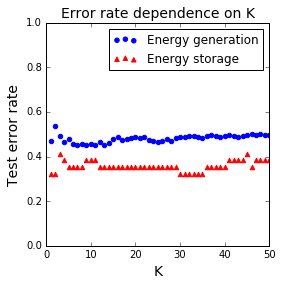

In [37]:
plt.figure(figsize=(4,4))
plt.scatter(k_x, test_gen, label='Energy generation', color='blue')
plt.scatter(k_x, test_stor, label='Energy storage', marker='^', color='red')
plt.ylim(0,1)
plt.xlim(0, 50)
plt.xlabel('K', size=14)
plt.ylabel('Test error rate', size=14)
plt.legend()
plt.title("Error rate dependence on K", size=14)

In [ ]:
gen_train, gen_test = train_test_split(gen, test_size=0.05)
em.plot_knn_error(25, 'uniform', gen_train, gen_test)
plt.legend();

### To be added
* More discussion of KNN accuracy in this section, comparing generation and storage, etc.
* Bootstrapping or bagging in this section, to make sure the conclusions are robust and not sensitive to training data selection

## KNN for visualization of predicted energy types

### To do
* Overlay facilities onto these maps and comment on apparent accuracy of model
* ???

In [ ]:
import folium

# K = 1

In [ ]:
counties_df = ela.geojson_to_df(ela.counties)
ela.geojson_centers(counties_df)
em.geojson_predict_k(counties_df, ela.gen_data, ela.stor_data, 1)
gen_dict = ela.pred_gen_to_colors(counties_df)
stor_dict = ela.pred_stor_to_colors(counties_df)

In [ ]:
pred_gen_map = folium.GeoJson(ela.counties,
                          style_function=lambda feature: {
                              'fillColor': gen_dict[feature['id']],
                              'weight': 0,
                              'fillOpacity' : 0.5})
m = folium.Map(location=[38,-98], zoom_start=4)
m.add_child(pred_gen_map)

In [ ]:
pred_stor_map = folium.GeoJson(ela.counties,
                          style_function=lambda feature: {
                              'fillColor': stor_dict[feature['id']],
                              'weight': 0,
                          'fillOpacity' : 0.5})
m = folium.Map(location=[38,-98], zoom_start=4)
m.add_child(pred_stor_map)

# K = 5

In [ ]:
counties_df = ela.geojson_to_df(ela.counties)
ela.geojson_centers(counties_df)
em.geojson_predict_k(counties_df, ela.gen_data, ela.stor_data, 5)
gen_dict = ela.pred_gen_to_colors(counties_df)
stor_dict = ela.pred_stor_to_colors(counties_df)

In [ ]:
pred_gen_map = folium.GeoJson(ela.counties,
                          style_function=lambda feature: {
                              'fillColor': gen_dict[feature['id']],
                              'weight': 0,
                          'fillOpacity' : 0.5})
m = folium.Map(location=[38,-98], zoom_start=4)
m.add_child(pred_gen_map)

In [ ]:
pred_stor_map = folium.GeoJson(ela.counties,
                          style_function=lambda feature: {
                              'fillColor': stor_dict[feature['id']],
                              'weight': 0,
                          'fillOpacity' : 0.5})
m = folium.Map(location=[38,-98], zoom_start=4)
m.add_child(pred_stor_map)

# K = 20

In [ ]:
counties_df = ela.geojson_to_df(ela.counties)
ela.geojson_centers(counties_df)
em.geojson_predict_k(counties_df, ela.gen_data, ela.stor_data, 20)
gen_dict = ela.pred_gen_to_colors(counties_df)
stor_dict = ela.pred_stor_to_colors(counties_df)

In [ ]:
pred_gen_map = folium.GeoJson(ela.counties,
                          style_function=lambda feature: {
                              'fillColor': gen_dict[feature['id']],
                              'weight': 0,
                          'fillOpacity' : 0.5})
m = folium.Map(location=[38,-98], zoom_start=4)
m.add_child(pred_gen_map)

In [ ]:
pred_stor_map = folium.GeoJson(ela.counties,
                          style_function=lambda feature: {
                              'fillColor': stor_dict[feature['id']],
                              'weight': 0,
                          'fillOpacity' : 0.5})
m = folium.Map(location=[38,-98], zoom_start=4)
m.add_child(pred_stor_map)

# K = 50

In [ ]:
counties_df = ela.geojson_to_df(ela.counties)
ela.geojson_centers(counties_df)
em.geojson_predict_k(counties_df, ela.gen_data, ela.stor_data, 50)
gen_dict = ela.pred_gen_to_colors(counties_df)
stor_dict = ela.pred_stor_to_colors(counties_df)

In [ ]:
pred_gen_map = folium.GeoJson(ela.counties,
                          style_function=lambda feature: {
                              'fillColor': gen_dict[feature['id']],
                              'weight': 0,
                          'fillOpacity' : 0.5})
m = folium.Map(location=[38,-98], zoom_start=4)
m.add_child(pred_gen_map)

In [ ]:
pred_stor_map = folium.GeoJson(ela.counties,
                          style_function=lambda feature: {
                              'fillColor': stor_dict[feature['id']],
                              'weight': 0,
                          'fillOpacity' : 0.5})
m = folium.Map(location=[38,-98], zoom_start=4)
m.add_child(pred_stor_map)

# Facilities

In [6]:
import folium

In [11]:
gen_f = ela.facility_map(state=None, gen_or_stor='gen')


In [14]:
m = folium.Map(location=[38,-98], zoom_start=4)
m.add_child(gen_f)

In [15]:
f = ela.facility_map(state=None, gen_or_stor='stor')
m = folium.Map(location=[38,-98], zoom_start=4)
m.add_child(f)